# Simple electricity market: Europe

## Single bidding zone with fixed load, one period

In this example we consider a single market bidding zone, Germany, France and Belgium.

The inelastic load has essentially infinite marginal utility (or higher than the marginal cost of any generator).

#### 1)Import Packages

In [104]:
import pypsa
#import pandapower as pp
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import cartopy.crs as ccrs
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("pypsa.pf").setLevel(logging.WARNING)
plt.rc("figure", figsize=(10, 8))

#### 2)Create a network and set Snapshots

In [105]:
# Create a new PyPSA network
network = pypsa.Network()
network.set_snapshots(range(1))  # Solve for a year 365*24

In [106]:
type(network)

pypsa.components.Network

In [107]:
os.getcwd()

'C:\\Users\\par19744\\BTU_lectures_2024\\Lect_3'

#### 3)Add Buses

In [108]:
# Read excel file which contains Non renewable generators data
bus=pd.read_excel('data_Europe.xlsx',sheet_name='buses',header=0)

In [109]:
bus

,bus,v_nom,carrier,x,y
0,Germany,380,AC,10.4515,51.1657
1,France,380,AC,2.2137,46.2276
2,Belgium,380,AC,4.4699,50.5039


In [110]:
for index, row in bus.iterrows():
    network.add(
        "Bus",
        name=row['bus'],
        v_nom=row['v_nom'],
        carrier=row['carrier'],
        x=row['x'],
        y=row['y']
    )

In [111]:
network.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
Germany,380.0,,10.4515,51.1657,AC,,1.0,0.0,inf,PQ,,
France,380.0,,2.2137,46.2276,AC,,1.0,0.0,inf,PQ,,
Belgium,380.0,,4.4699,50.5039,AC,,1.0,0.0,inf,PQ,,


#### 4)Add generators

In [112]:
# Read excel file which contains Non renewable generators data
generators=pd.read_excel('data_Europe.xlsx',sheet_name='generators')

In [113]:
generators

,generator,p_nom,p_nom_max,bus,p_nom_extendable,marginal_cost,lifetime,efficiency,start_up_cost,shut_down_cost,min_up_time,min_down_time,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
0,Germany Wind,6,6,Germany,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Germany Coal,5,20,Germany,True,30,NaN,NaN,NaN,NaN,4.0,3.0,0.54,0.75,NaN,NaN
2,Germany Gas,10,20,Germany,True,50,NaN,NaN,NaN,NaN,2.0,2.0,0.75,0.75,NaN,NaN
3,France Gas,8,15,France,True,65,NaN,NaN,NaN,NaN,2.0,2.0,0.75,0.75,NaN,NaN
4,France Wind,1,1,France,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,France Hydro,4,6,France,True,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Belgium Solar,3,3,Belgium,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Belgium Gas,3,5,Belgium,True,60,NaN,NaN,NaN,NaN,2.0,2.0,0.75,0.75,NaN,NaN


In [114]:
network.madd(
    "Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.generator),
    p_nom=list(generators.p_nom),
    p_nom_max=list(generators.p_nom_max),  # MW
    p_nom_extendable=list(generators.p_nom_extendable),
    marginal_cost=list(generators.marginal_cost),
)
network.generators

,bus,carrier,p_nom,p_nom_max,p_nom_extendable,marginal_cost,control,type,p_nom_mod,p_nom_min,p_min_pu,p_max_pu,p_set,q_set,sign,marginal_cost_quadratic,build_year,lifetime,capital_cost,efficiency,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Germany Wind,Germany,Germany Wind,6.0,6.0,False,0.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Germany Coal,Germany,Germany Coal,5.0,20.0,True,30.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Germany Gas,Germany,Germany Gas,10.0,20.0,True,50.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
France Gas,France,France Gas,8.0,15.0,True,65.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
France Wind,France,France Wind,1.0,1.0,False,0.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
France Hydro,France,France Hydro,4.0,6.0,True,0.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Belgium Solar,Belgium,Belgium Solar,3.0,3.0,False,0.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Belgium Gas,Belgium,Belgium Gas,3.0,5.0,True,60.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [115]:
network.generators

,bus,carrier,p_nom,p_nom_max,p_nom_extendable,marginal_cost,control,type,p_nom_mod,p_nom_min,p_min_pu,p_max_pu,p_set,q_set,sign,marginal_cost_quadratic,build_year,lifetime,capital_cost,efficiency,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Germany Wind,Germany,Germany Wind,6.0,6.0,False,0.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Germany Coal,Germany,Germany Coal,5.0,20.0,True,30.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Germany Gas,Germany,Germany Gas,10.0,20.0,True,50.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
France Gas,France,France Gas,8.0,15.0,True,65.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
France Wind,France,France Wind,1.0,1.0,False,0.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
France Hydro,France,France Hydro,4.0,6.0,True,0.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Belgium Solar,Belgium,Belgium Solar,3.0,3.0,False,0.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Belgium Gas,Belgium,Belgium Gas,3.0,5.0,True,60.0,PQ,,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


#### 5)Add load

In [116]:
# Read excel file which contains Non renewable generators data
load=pd.read_excel('data_Europe.xlsx',sheet_name='load',header=0)

In [117]:
load

,bus,load
0,Germany,20
1,France,14
2,Belgium,6


In [118]:
for index, row in load.iterrows():
    network.add(
        "Load",
        name=row['bus'],
        bus=row['bus'],
        p_set=row['load'],
    )

In [119]:
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
Germany,Germany,,,20.0,0.0,-1.0
France,France,,,14.0,0.0,-1.0
Belgium,Belgium,,,6.0,0.0,-1.0


#### 6)Add Transmission lines

In [120]:
# Read excel file which contains Non renewable generators data
lines=pd.read_excel('data_Europe.xlsx',sheet_name='lines',header=0)

In [121]:
lines.head()

,country_1,country_2,cap_MW
0,Germany,France,10
1,Belgium,Germany,10
2,France,Belgium,10


In [122]:
# Add line connection between the buses
for index, row in lines.iterrows():
    network.add(
        "Line",
        "{}_{}".format(row['country_1'],row['country_2']),
        bus0=row['country_1'],
        bus1=row['country_2'],
        s_nom=row['cap_MW'],
        x=1,
    )

In [123]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,s_nom_min,s_nom_max,s_max_pu,capital_cost,build_year,lifetime,length,carrier,terrain_factor,num_parallel,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Germany_France,Germany,France,,1.0,0.0,0.0,0.0,10.0,0.0,False,0.0,inf,1.0,0.0,0,inf,0.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium_Germany,Belgium,Germany,,1.0,0.0,0.0,0.0,10.0,0.0,False,0.0,inf,1.0,0.0,0,inf,0.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France_Belgium,France,Belgium,,1.0,0.0,0.0,0.0,10.0,0.0,False,0.0,inf,1.0,0.0,0,inf,0.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
network

PyPSA Network
Components:
 - Bus: 3
 - Generator: 8
 - Line: 3
 - Load: 3
Snapshots: 1

#### 7)Solve the network

In [125]:
network.optimize(solver_name='highs')

Index(['Germany_France', 'Belgium_Germany', 'France_Belgium'], dtype='object', name='Line')
Index(['Germany_France', 'Belgium_Germany', 'France_Belgium'], dtype='object', name='Line')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.07s
INFO:linopy.solvers:Log file at C:\Users\par19744\AppData\Local\Temp\highs.log.
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 16 primals, 36 duals
Objective: 8.00e+02
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Line-fix-s-lower, Line-fix-s-upper, Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

#### 8)Visualization of results

In [126]:
network.buses_t.marginal_price

Bus,Germany,France,Belgium
snapshot,,,
0,50.0,50.0,50.0


In [127]:
clearing_price_redisp = network.buses_t.marginal_price.iloc[0].max()
clearing_price_redisp

50.0

In [128]:
network.generators.p_nom_opt

Generator
Germany Wind      6.0
Germany Coal     20.0
Germany Gas      20.0
France Gas       15.0
France Wind       1.0
France Hydro      6.0
Belgium Solar     3.0
Belgium Gas       5.0
Name: p_nom_opt, dtype: float64

<Axes: xlabel='Generator', ylabel='MW'>

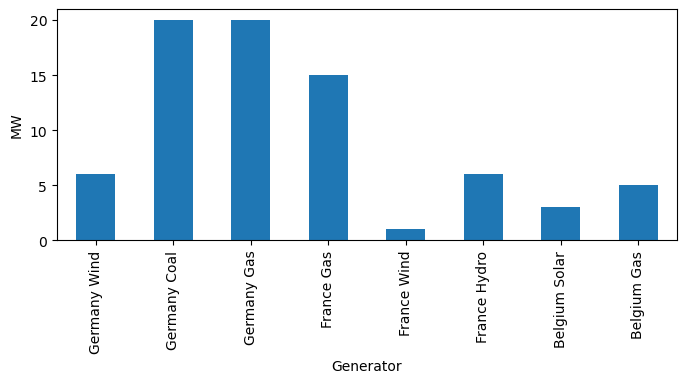

In [131]:
network.generators.p_nom_opt.plot.bar(ylabel="MW", figsize=(8, 3))

In [132]:
network.lines_t.p0

Line,Germany_France,Belgium_Germany,France_Belgium
snapshot,,,
0,5.666667,-4.333333,-1.333333


In [133]:
gen = network.generators.assign(g=network.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()
gen

bus      carrier      
Belgium  Belgium Gas       0.0
         Belgium Solar     3.0
France   France Gas        0.0
         France Hydro      6.0
         France Wind       1.0
Germany  Germany Coal     20.0
         Germany Gas       4.0
         Germany Wind      6.0
Name: g, dtype: float64

In [134]:
flow = pd.Series(10, index=network.branches().index)
flow

component  name           
Line       Germany_France     10
           Belgium_Germany    10
           France_Belgium     10
dtype: int64

c:\Users\par19744\.conda\envs\PyPSA\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



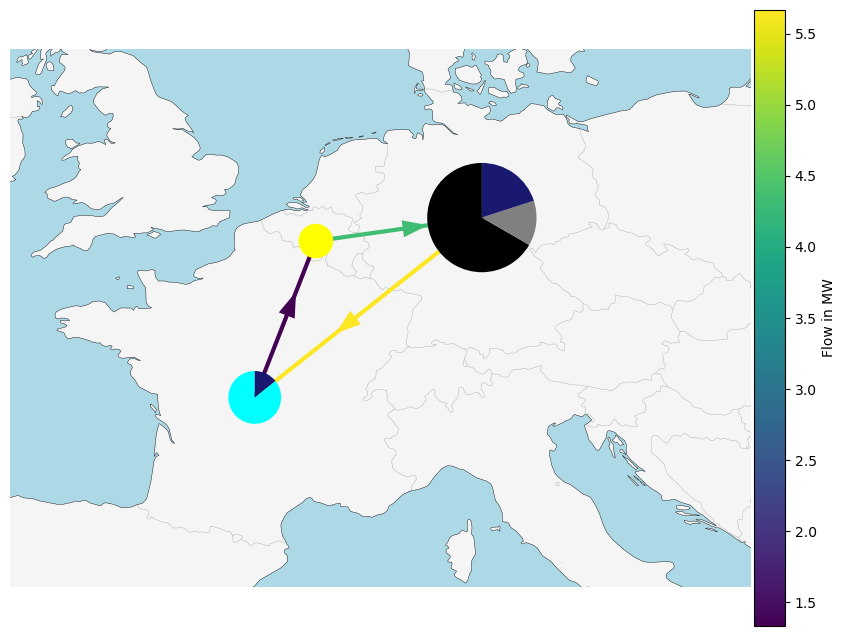

In [135]:
plot_graph=network.plot(
    bus_sizes=gen/10,
    bus_colors={"Germany Wind":"midnightblue","Germany Coal": "black", "Germany Gas": "gray","France Gas":"gray","France Wind":"midnightblue","France Hydro":"cyan","Belgium Solar":"yellow","Belgium Gas":"gray"},
    margin=1,
    line_widths=3,
    link_widths=0,
    flow=flow,
    color_geomap=True,
    projection=ccrs.EqualEarth(),
    line_colors=network.lines_t.p0.mean().abs(),
)
plt.colorbar(plot_graph[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()